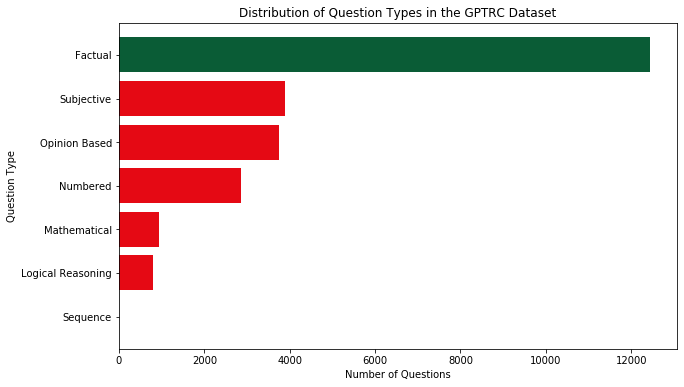

In [1]:
import matplotlib.pyplot as plt

# Categories and their corresponding counts
categories = ['Numbered', 'Mathematical', 'Logical Reasoning', 'Opinion Based', 'Subjective', 'Sequence', 'Factual']
counts = [2859, 941, 799, 3750, 3901, 9, 12451]

# Sort categories and counts based on counts in descending order
sorted_data = sorted(zip(categories, counts), key=lambda x: x[1], reverse=False)
categories, counts = zip(*sorted_data)

# Define colors for each bar
colors = ['#E50914'] * len(categories)  # Default color for all bars
factual_index = categories.index('Factual')
colors[factual_index] = '#0A5C36'  # Change color for 'Factual' bar

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size as needed
plt.barh(categories, counts, color=colors)  # Use plt.barh() for horizontal bar chart

# Adding titles and labels
plt.title('Distribution of Question Types in the GPTRC Dataset')
plt.xlabel('Number of Questions')
plt.ylabel('Question Type')

# Show the plot
plt.show()

In [4]:
import pandas as pd

data = {'Category': categories, 'Count': counts}
df = pd.DataFrame(data)

# Sort the DataFrame by 'Count' column in descending order
df = df.sort_values(by='Count', ascending=False)

# Print the DataFrame as a table
df

,Category,Count
6,Factual,12451
5,Subjective,3901
4,Opinion Based,3750
3,Numbered,2859
2,Mathematical,941
1,Logical Reasoning,799
0,Sequence,9
